                               Image Filtering

Filtering is usually done with a intention of improving the quality of image(enhancing its features)

In [1]:
#Local filtering
#In basically local filtering we try to convolve the image with a kernel
#We try to average the nearby pixels to denoise the image or say the signal
#The greate the no of pixel we are averaging the more is the image denoised

#Difference filtering
#Here when the neibhouring values are close we are getting filter response zero
#Here we also get spike at boundary

#We can aslo use filters combinely

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from skimage import data
from skimage import io

image = np.zeros((15,15),dtype = float)
image[3:12,3:12] = 1
image

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

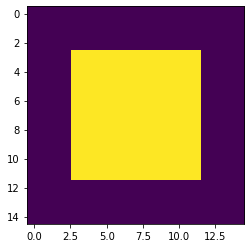

In [5]:
f,axes = plt.subplots()
axes.imshow(image)

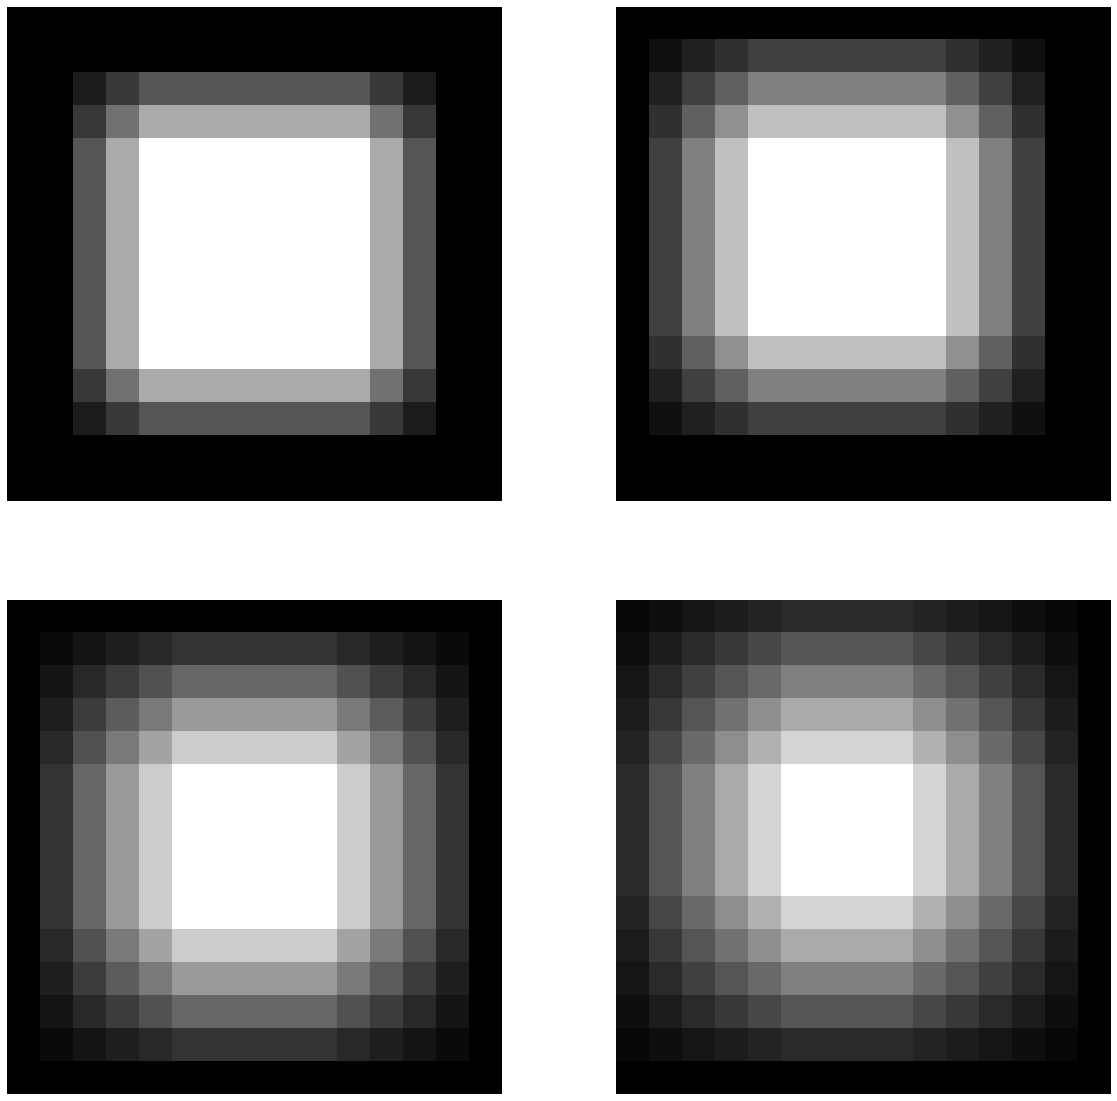

In [6]:
#Mean filtering
#Increasing the filter size in subsequent filters
filter1 = np.full((3,3),1/9)
filter2 = np.full((4,4),1/16)
filter3 = np.full((5,5),1/25)
filter4 = np.full((6,6),1/36)
#Now convolving this filter with the image
import scipy.ndimage as ndi
image_filtered1 = ndi.convolve(image,filter1)
image_filtered2 = ndi.convolve(image,filter2)
image_filtered3 = ndi.convolve(image,filter3)
image_filtered4 = ndi.convolve(image,filter4)

f,axes = plt.subplots(2,2,figsize=(20,20),sharey = True)
axes = axes.ravel()
for ax in axes:
    ax.axis("off")

a = [image_filtered1,image_filtered2,image_filtered3,image_filtered4]
for i,pro in enumerate(a):
    axes[i].imshow(pro,cmap = "gray")
#Here basically after the filtering the intensity distribution changed
#The intensity of the bright pixel decreased but that of of neibhouring pixel increased

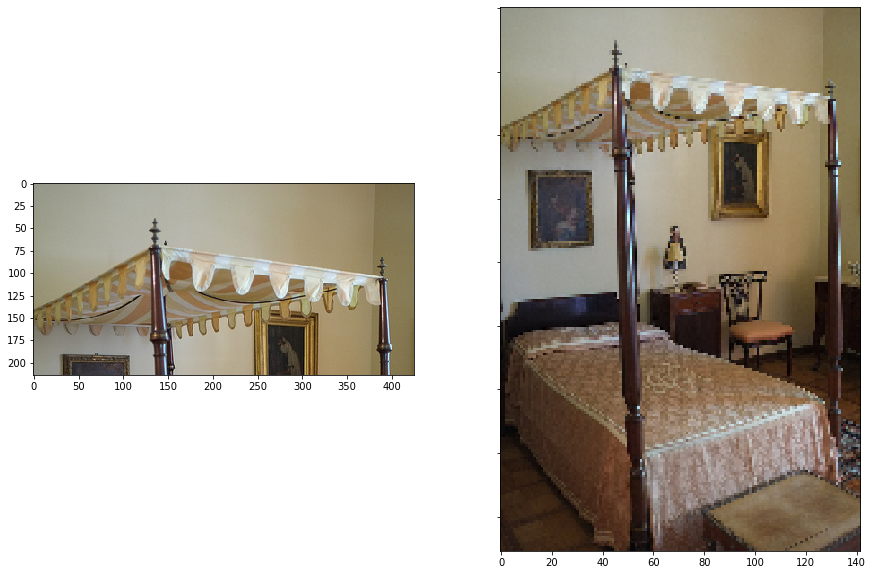

In [7]:
#Downsampling the image
image = io.imread("/home/bluebrain/Desktop/image analysis/images/7581246086_cf7bbb7255_z.jpg")
pixelated = image[::3,::3]
#It basically gives every 3rd row and every 3rd column of image
f, (ax1,ax2)= plt.subplots(1,2,figsize = (15,10),sharey = True)
ax1.imshow(image)
ax2.imshow(pixelated)

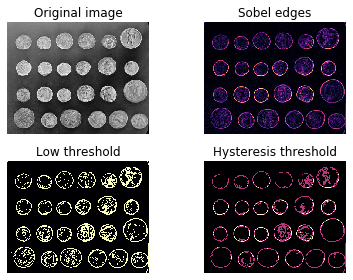

In [8]:
#Applying hysteresis thresholding to a image
import matplotlib.pyplot as plt
from skimage import data, filters

fig, ax = plt.subplots(nrows=2, ncols=2)

image = data.coins()
edges = filters.sobel(image)

low = 0.1
high = 0.35

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight + hyst, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()


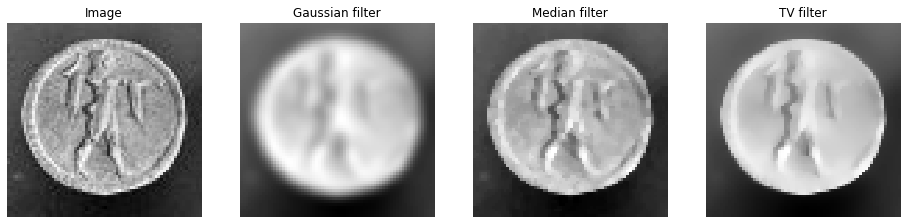

In [9]:
#Applying various denoising filters to a image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import restoration

coins = data.coins()
#Gaussain filter is a linear filter and is used to blur a image and reduce noise
gaussian_filter_coins = filters.gaussian(coins, sigma=2)
med_filter_coins = filters.median(coins, np.ones((3, 3)))
tv_filter_coins = restoration.denoise_tv_chambolle(coins, weight=0.1)

plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.imshow(coins[10:80, 300:370], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Image')
plt.subplot(142)
plt.imshow(gaussian_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Gaussian filter')
plt.subplot(143)
plt.imshow(med_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Median filter')
plt.subplot(144)
plt.imshow(tv_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('TV filter')
plt.show()


In [ ]:
#Denoising a image
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral


lena = img_as_float(data.lena())
lena = lena[220:300, 220:320]

noisy = lena + 0.6 * lena.std() * np.random.random(lena.shape)
noisy = np.clip(noisy, 0, 1)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_range=0.05, sigma_spatial=15))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')

ax[1, 0].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 0].axis('off')
ax[1, 0].set_title('(more) TV')
ax[1, 1].imshow(denoise_bilateral(noisy, sigma_range=0.1, sigma_spatial=15))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) Bilateral')
ax[1, 2].imshow(lena)
ax[1, 2].axis('off')
ax[1, 2].set_title('original')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()